# TITLE

**GROUP 03 _ DATA102 S13**

Members:

Bacar, Jedrek Jua Rephael A.
De Silva, Wayne FLossien T.
Llenado, Lexandra Mitchelle D.

## INTRODUCTION

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam sit amet turpis aliquam, semper est nec, rhoncus lorem. Vivamus ornare leo at sapien maximus maximus. Interdum et malesuada fames ac ante ipsum primis in faucibus. Curabitur magna magna, feugiat ut ornare ac, bibendum id nulla. Donec euismod mollis sapien, in fringilla ex accumsan id. Nulla ut finibus neque, sit amet vehicula enim. Donec magna nisl, commodo vitae tristique at, egestas nec eros. Donec bibendum mattis lacus, nec luctus tellus faucibus eget. Phasellus porttitor ligula nec efficitur finibus. Donec volutpat convallis purus nec mollis.

Etiam placerat laoreet nunc, ac vulputate quam. Ut convallis metus nisl, quis ornare quam elementum ac. Vestibulum tincidunt ipsum ipsum, sit amet posuere mauris sagittis semper. Morbi et aliquet quam. Fusce non placerat eros, sit amet facilisis mi. Cras justo arcu, suscipit vitae commodo eget, finibus et elit. Curabitur et ligula hendrerit, tempor mauris nec, cursus magna. Donec finibus nisl sed orci ultricies pellentesque.

### IMPORTING LIBRARIES

In [559]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

### THE DATASET

This dataset contains detailed information about movies listed on IMDb, including titles, genres, release dates, and ratings. It also includes user reviews and ratings, making it an excellent resource for sentiment analysis and trend analysis in the movie industry. This dataset can be used to gain insights into movie trends, audience preferences, and the correlation between movie attributes and ratings.

In [561]:
df = pd.read_csv('IMDb_Dataset.csv')
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


### Exploratory Data Analysis

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


In [74]:
df.head()


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


In [75]:
# Identify all duplicate rows (including the first occurrence)
duplicate_rows = df[df.duplicated(keep=False)]

duplicate_rows

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
8,Burden,6.7,2018,R,Biography,Andrew Heckler,Garrett HedlundAndrea RiseboroughForest Whitaker,57.0,https://m.media-amazon.com/images/M/MV5BMTlhNz...,117.0
13,A Tale of Love and Darkness,6.0,2015,PG-13,Biography,Natalie Portman,Natalie PortmanGilad KahanaAmir Tessler,55.0,https://m.media-amazon.com/images/M/MV5BMjIyNz...,95.0
16,Muscle Shoals,7.8,2013,PG,Documentary,Greg 'Freddy' Camalier,Rick HallAretha FranklinKeith Richards,75.0,https://m.media-amazon.com/images/M/MV5BMTUzMz...,111.0
...,...,...,...,...,...,...,...,...,...,...
3159,The Lord of the Rings: The Two Towers,8.8,2002,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,87.0,https://m.media-amazon.com/images/M/MV5BZGMxZT...,179.0
3162,Inception,8.8,2010,PG-13,Action,Christopher Nolan,Leonardo DiCaprioJoseph Gordon-LevittElliot Page,74.0,https://m.media-amazon.com/images/M/MV5BMjAxMz...,148.0
3164,The Lord of the Rings: The Fellowship of the Ring,8.9,2001,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,92.0,https://m.media-amazon.com/images/M/MV5BN2EyZj...,178.0
3168,The Lord of the Rings: The Return of the King,9.0,2003,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,94.0,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,201.0


In [76]:
# Checking if it is a duplicated title/row
specific_title = "End of the Spear"  

# Search for the row(s) with the specific title
specific_row = df[df['Title'] == specific_title]

specific_row

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
2462,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0


In [77]:
# Drop duplicated rows 
df2 = df.drop_duplicates()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2762 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               2762 non-null   object 
 1   IMDb Rating         2762 non-null   float64
 2   Year                2762 non-null   int64  
 3   Certificates        2762 non-null   object 
 4   Genre               2762 non-null   object 
 5   Director            2762 non-null   object 
 6   Star Cast           2762 non-null   object 
 7   MetaScore           2762 non-null   float64
 8   Poster-src          2762 non-null   object 
 9   Duration (minutes)  2762 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 237.4+ KB


In [78]:
df2.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,2762.000000,2762.000000,2762.000000,2762.000000
mean,6.898371,2004.443881,65.755612,115.241781
std,0.809457,16.955123,10.863215,21.184385
min,3.900000,1917.000000,20.000000,46.000000
25%,6.400000,1997.000000,65.000000,105.000000
50%,6.900000,2010.000000,66.000000,116.300000
75%,7.400000,2016.000000,67.000000,120.000000
max,9.500000,2025.000000,100.000000,317.000000


In [79]:
# Counting the missing values in the data
df2.isna().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Poster-src            0
Duration (minutes)    0
dtype: int64

In [80]:
# Drop Poster-src as it won't be used
df2 = df2.drop('Poster-src', axis=1)

In [81]:
df2['Star Cast'] = df2['Star Cast'].apply(lambda x: ', '.join(re.findall(r'[A-Z][a-z]* [A-Z][a-z]+', x)))
df2

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


#### Charts and Possible Findings

In [82]:
# Selecting relevant columns for a correlation matrix
correlation_columns = ['MetaScore', 'Duration (minutes)', 'Year', 'IMDb Rating']

# Computing the correaltion
correlation_df2 = df2[correlation_columns].corr()

#Displaying the correlation
print(correlation_df2)


                    MetaScore  Duration (minutes)      Year  IMDb Rating
MetaScore            1.000000            0.108200 -0.121749     0.404060
Duration (minutes)   0.108200            1.000000 -0.108597     0.178586
Year                -0.121749           -0.108597  1.000000    -0.032286
IMDb Rating          0.404060            0.178586 -0.032286     1.000000


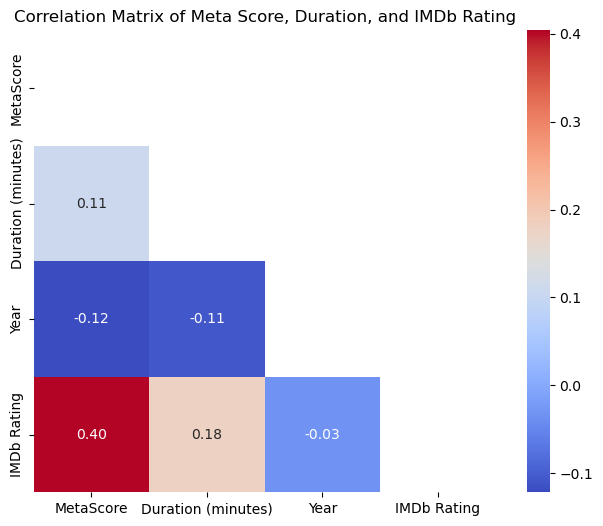

In [83]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_df2, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(correlation_df2, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', square=True)

# Title and show plot
plt.title('Correlation Matrix of Meta Score, Duration, and IMDb Rating')
plt.show()

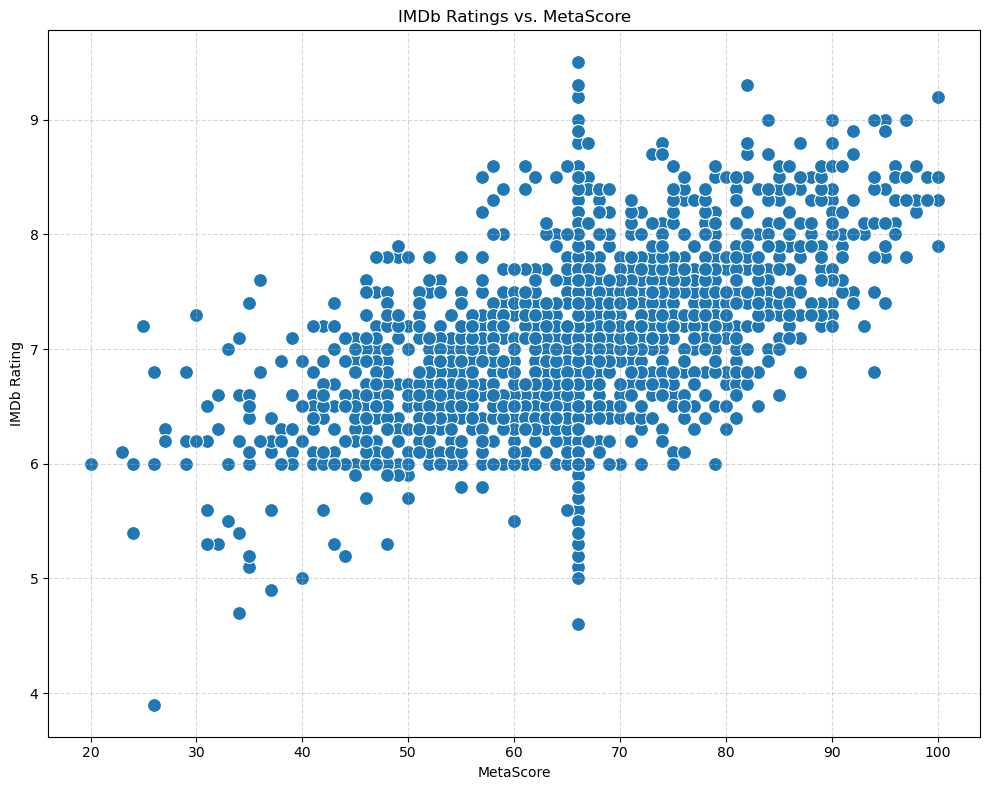

In [84]:
# Create the scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df2, x='MetaScore', y='IMDb Rating', 
                s=100,)

# Set plot title and labels
plt.title('IMDb Ratings vs. MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('IMDb Rating')


# Show gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [85]:
# Count the frequency of each certificate
certificate_counts = df2['Certificates'].value_counts()
certificate_counts

Certificates
R            1618
PG-13         535
PG            380
Not Rated      94
G              84
Approved       13
TV-14          10
NC-17           8
Unrated         7
TV-MA           5
TV-PG           3
M/PG            1
TV-Y7           1
X               1
Passed          1
TV-G            1
Name: count, dtype: int64

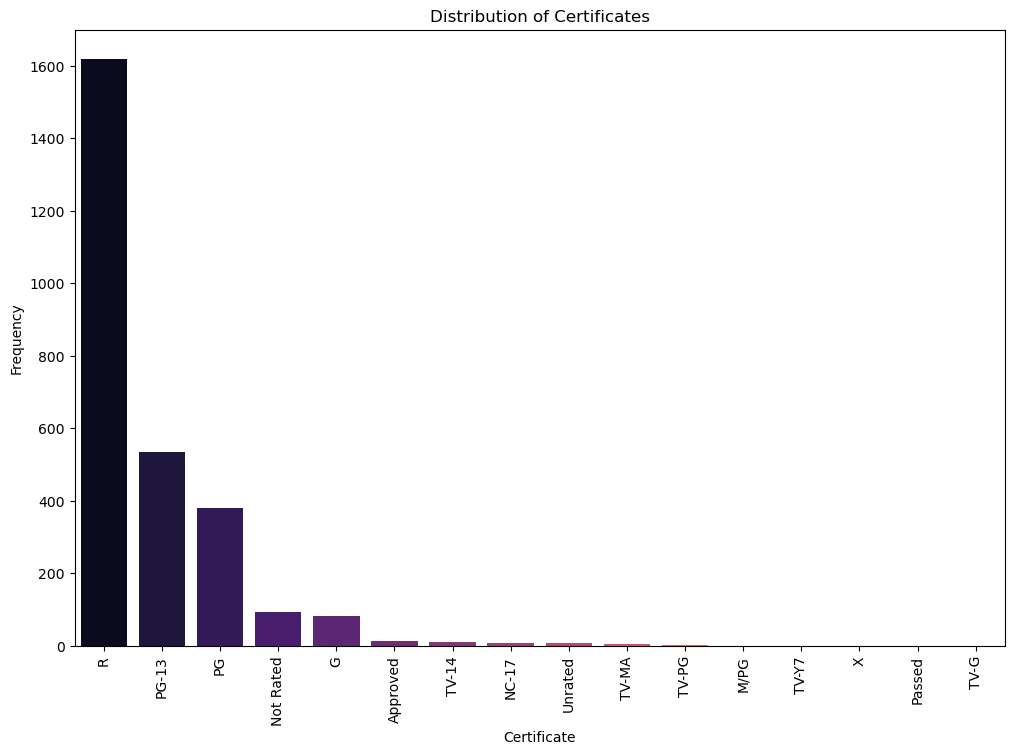

In [86]:
# Create a bar chart for Distribution of Certificates
plt.figure(figsize=(12, 8))
sns.barplot(x=certificate_counts.index, y=certificate_counts.values, palette='magma')
plt.title('Distribution of Certificates')
plt.xlabel('Certificate')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [87]:
# Count the frequency of each certificate
genre_counts = df2['Genre'].value_counts()
genre_counts

Genre
Biography      679
Action         482
Drama          404
Documentary    235
Comedy         230
Sci-Fi         203
Animation      174
Adventure      167
Horror          63
Crime           62
Fantasy         26
Mystery         15
History          7
Family           7
Romance          4
Musical          3
Reality-TV       1
Name: count, dtype: int64

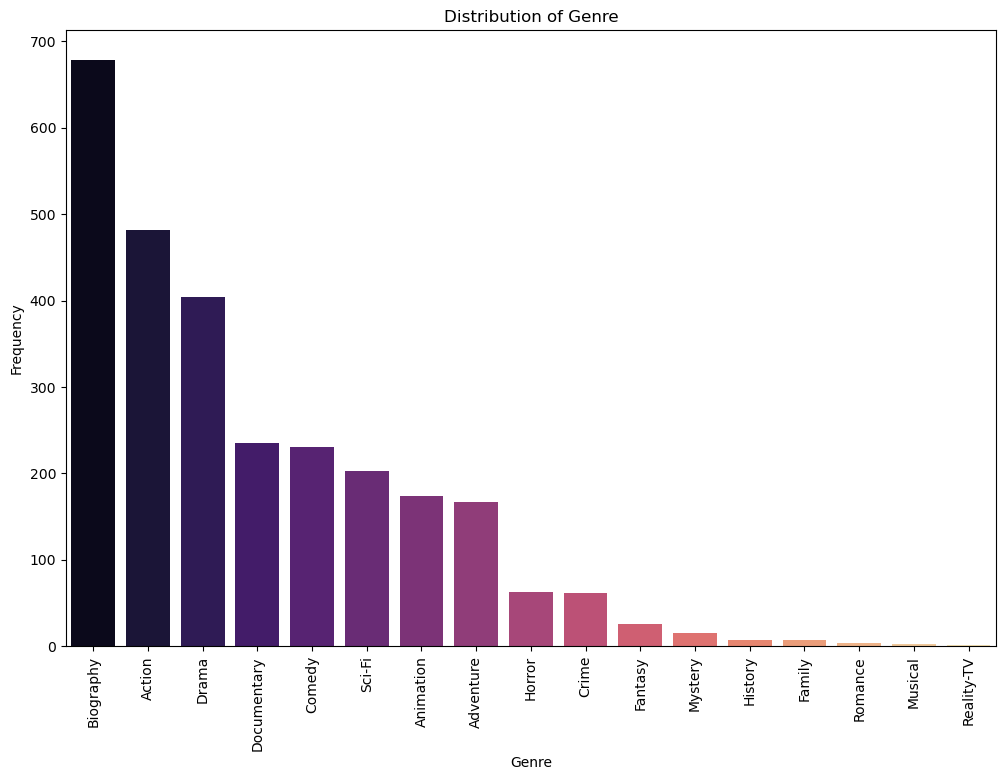

In [88]:
# Create a bar chart for Distribution of Genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [89]:
# Count the frequency of each year and sort the counts by year
year_counts = df2['Year'].value_counts().sort_index()

# Convert the Series to a DataFrame so that we can see all of the frequency per year
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ['Year', 'Count']

# Display the DataFrame and view as scrollable output
print(year_counts_df.to_string(index=False))

 Year  Count
 1917      2
 1918      1
 1924      1
 1927      1
 1931      1
 1933      1
 1934      1
 1935      3
 1936      2
 1937      1
 1938      1
 1940      1
 1942      2
 1943      1
 1944      1
 1945      2
 1946      2
 1948      2
 1950      2
 1951      2
 1952      3
 1953      3
 1954      5
 1955      1
 1956      8
 1957      4
 1959      3
 1960      3
 1961      5
 1962      7
 1963      7
 1964      4
 1965      4
 1966      9
 1967      6
 1968     12
 1969     16
 1970     17
 1971     17
 1972     15
 1973     17
 1974     17
 1975     21
 1976     13
 1977     11
 1978      9
 1979      9
 1980     16
 1981     23
 1982     13
 1983     19
 1984     19
 1985     25
 1986     15
 1987     24
 1988     30
 1989     27
 1990     30
 1991     16
 1992     26
 1993     35
 1994     31
 1995     32
 1996     26
 1997     35
 1998     31
 1999     43
 2000     33
 2001     40
 2002     40
 2003     38
 2004     47
 2005     54
 2006     60
 2007     87
 2008     69

C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


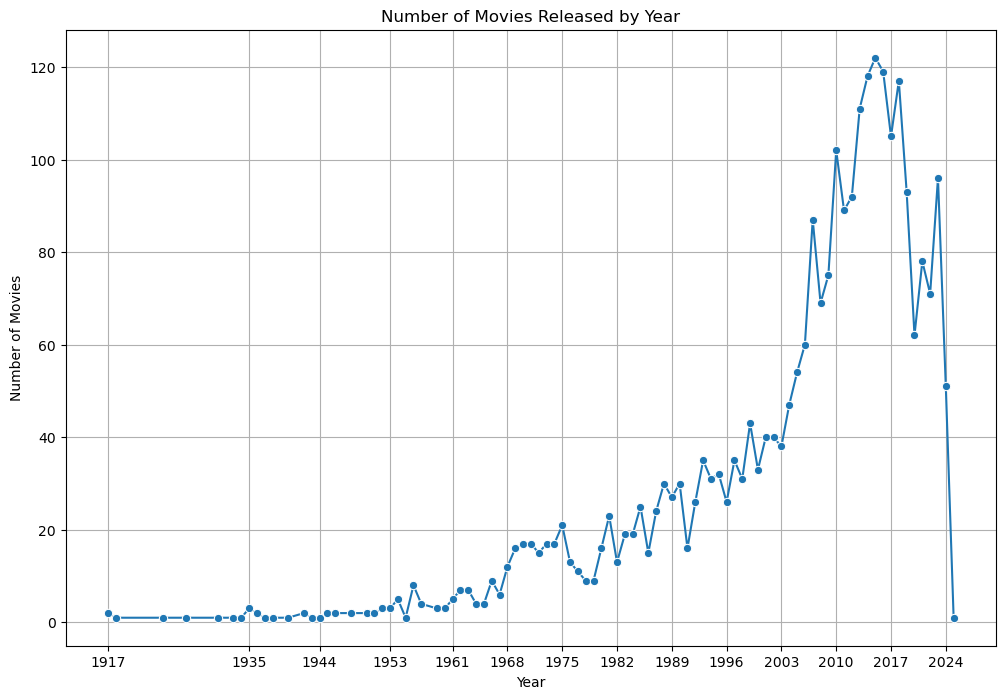

In [90]:
# Creating 12 labels to see better the year
labels = max(1, len(year_counts) // 12)
x_ticks = year_counts.index[::labels]

# Creating the line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')

# Set the title and labels
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Set the X-axis labels
plt.xticks(ticks=x_ticks, rotation=0)

# Enable the grid
plt.grid(True)

# Show the plot
plt.show()

C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

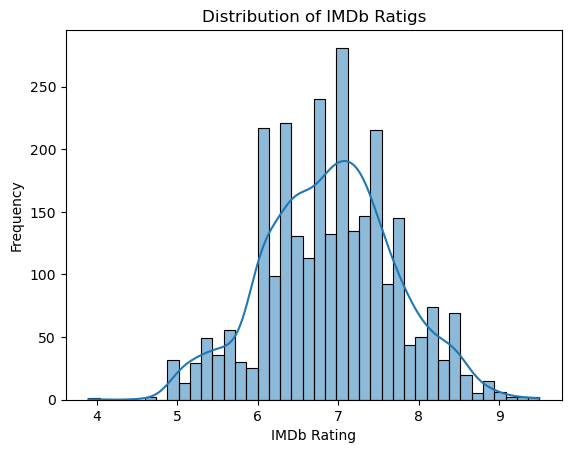

In [91]:
# IMDb Rating Distribution
sns.histplot(df2['IMDb Rating'], kde=True)
plt.title('Distribution of IMDb Ratigs')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

#### Directors In MetaScore, and IMDb

In [92]:
# Sort by IMDb Rating from highest to lowest
df2_sortedimdb = df2.sort_values(by='IMDb Rating', ascending=False)

# Display the top 200 IMDb Rating Movie
df2_sortedimdb200 = df2_sortedimdb.head(200)

df2_sortedimdb200

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
1710,Marty's Project,9.5,2010,R,Comedy,Andrew Kent,"Naomi Ash, David Bedford, Joanna Deering",66.0,116.3
2100,The People's Story,9.5,2000,PG,Documentary,Steven Scaffidi,"Daniel Radcliffe, Emma Watson, Rupert Grint",66.0,56.0
2102,Loving Carmen,9.3,2016,G,Documentary,Nayo Titzin,Nayo Titzin,66.0,66.0
3172,The Shawshank Redemption,9.3,1994,R,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,142.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0
...,...,...,...,...,...,...,...,...,...
2975,"Lock, Stock and Two Smoking Barrels",8.1,1998,R,Action,Guy Ritchie,"Jason Flemyng, Dexter Fletcher, Nick Moran",67.0,107.0
709,Into the Wild,8.1,2007,R,Adventure,Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener",73.0,148.0
2608,Woodstock,8.1,1970,R,Documentary,Michael Wadleigh,"Joan Baez, Richie Havens, Roger Daltrey",95.0,184.0
1391,Coleville,8.1,2016,R,Horror,Rhonda Harmon,"Andrew Brooks, Kiara Mc, John Mapp",66.0,116.3


In [93]:
# Count the frequency of each director in the top 200
directorimdb_counts = df2_sortedimdb200['Director'].value_counts()

directorimdb_years = df2_sortedimdb200.groupby('Director')['Year'].apply(list)

directorimdb_info = pd.DataFrame({
    'Count': directorimdb_counts,
    'Years': directorimdb_years
}).reset_index()

# Sort the combined DataFrame by the 'Count' column in descending order
directorimdb_sorted = directorimdb_info.sort_values(by='Count', ascending=False)

# Display the result
print(directorimdb_sorted.head(15))

                 Director  Count                                       Years
21      Christopher Nolan      7  [2008, 2010, 2014, 2006, 2012, 2000, 2023]
111         Peter Jackson      4                    [2003, 2001, 2002, 2018]
1          Akira Kurosawa      4                    [1954, 1963, 1952, 1975]
112     Quentin Tarantino      4                    [1994, 2012, 2009, 1992]
133       Stanley Kubrick      4                    [1957, 1980, 1964, 1968]
86        Martin Scorsese      4                    [1990, 2006, 2013, 1978]
135      Steven Spielberg      4                    [1993, 1998, 1981, 1993]
128          Sergio Leone      3                          [1966, 1968, 1984]
20        Charles Chaplin      3                          [1936, 1931, 1940]
41   Francis Ford Coppola      3                          [1972, 1974, 1979]
4        Alfred Hitchcock      3                          [1960, 1954, 1959]
76            Lee Unkrich      2                                [2017, 2010]

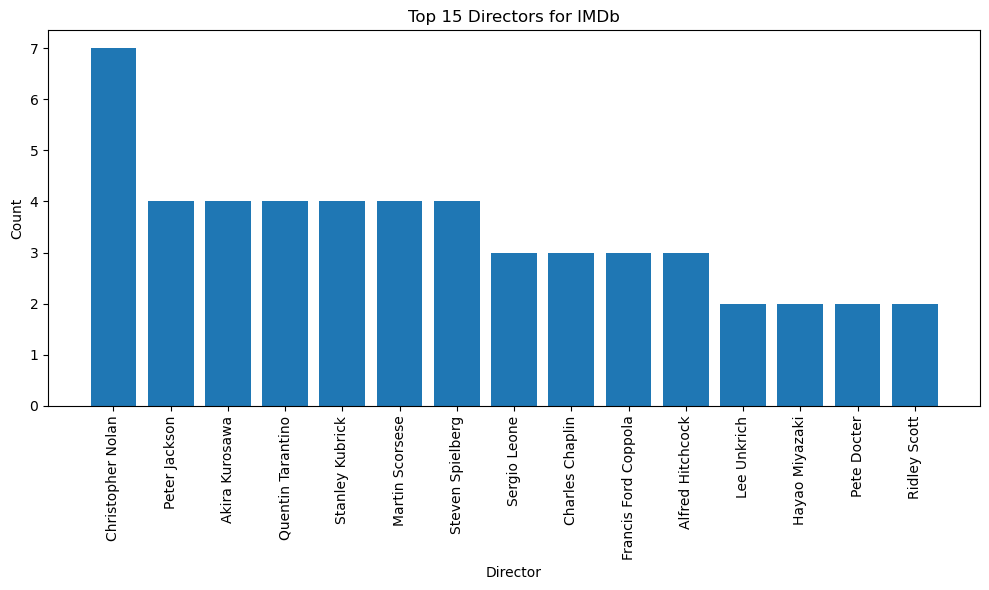

In [94]:
# Create a histogram of the top 15 directors
plt.figure(figsize=(10, 6))
plt.bar(directorimdb_sorted['Director'].head(15), directorimdb_sorted['Count'].head(15))
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 15 Directors for IMDb')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [95]:
# Sort by MetaScore from highest to lowest
df2_sortedmeta = df2.sort_values(by='MetaScore', ascending=False)

# Display the top 200 MetaScore Movies
df2_sortedmeta200 = df2_sortedmeta.head(200)

df2_sortedmeta200

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
694,Lawrence of Arabia,8.3,1962,PG,Adventure,David Lean,"Alec Guinness, Anthony Quinn",100.0,218.0
3122,Casablanca,8.5,1942,PG,Drama,Michael Curtiz,Howard Koch,100.0,102.0
2735,The Leopard,7.9,1963,PG,Drama,Luchino Visconti,"Giuseppe Tomasi, Suso Cecchi, Pasquale Festa",100.0,186.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0
3123,Rear Window,8.5,1954,PG,Mystery,Alfred Hitchcock,"James Stewart, Grace Kelly, Wendell Corey",100.0,112.0
...,...,...,...,...,...,...,...,...,...
594,Serpico,7.7,1973,R,Biography,Sidney Lumet,"Al Pacino, John Randolph, Jack Kehoe",83.0,130.0
2043,Mandy,6.5,2018,Not Rated,Action,Panos Cosmatos,"Panos Cosmatos, Aaron Stewart, Casper Kelly",83.0,121.0
49,20 Feet from Stardom,7.4,2013,PG-13,Documentary,Morgan Neville,"Darlene Love, Merry Clayton, Lisa Fischer",83.0,91.0
11,The King of Kong: A Fistful of Quarters,8.0,2007,PG-13,Documentary,Seth Gordon,"Steve Wiebe, Billy Mitchell, Mark Alpiger",83.0,79.0


In [96]:
# Count the frequency of each director in the top 200
directormeta_counts = df2_sortedmeta200['Director'].value_counts()

directormeta_years = df2_sortedmeta200.groupby('Director')['Year'].apply(list)

directormeta_info = pd.DataFrame({
    'Count': directormeta_counts,
    'Years': directormeta_years
}).reset_index()

# Sort the combined DataFrame by the 'Count' column in descending order
directormeta_sorted = directormeta_info.sort_values(by='Count', ascending=False)

# Display the result
print(directormeta_sorted.head(15))

                 Director  Count                                       Years
79        Martin Scorsese      7  [2019, 1990, 1980, 2023, 2006, 1978, 2011]
133      Steven Spielberg      6        [1993, 1998, 1975, 2012, 1981, 2017]
99          Peter Jackson      5              [2003, 2001, 2018, 2002, 1994]
0          Akira Kurosawa      4                    [1954, 1952, 1963, 1980]
25      Christopher Nolan      4                    [2017, 2023, 2008, 2000]
128       Stanley Kubrick      4                    [1964, 1957, 1960, 1968]
2        Alfred Hitchcock      3                          [1954, 1959, 1960]
125          Sidney Lumet      3                          [1957, 1975, 1973]
51         Hayao Miyazaki      3                          [2001, 2023, 2013]
41   Francis Ford Coppola      3                          [1972, 1979, 1974]
95        Paul Greengrass      2                                [2002, 2006]
23        Charles Chaplin      2                                [1931, 1936]

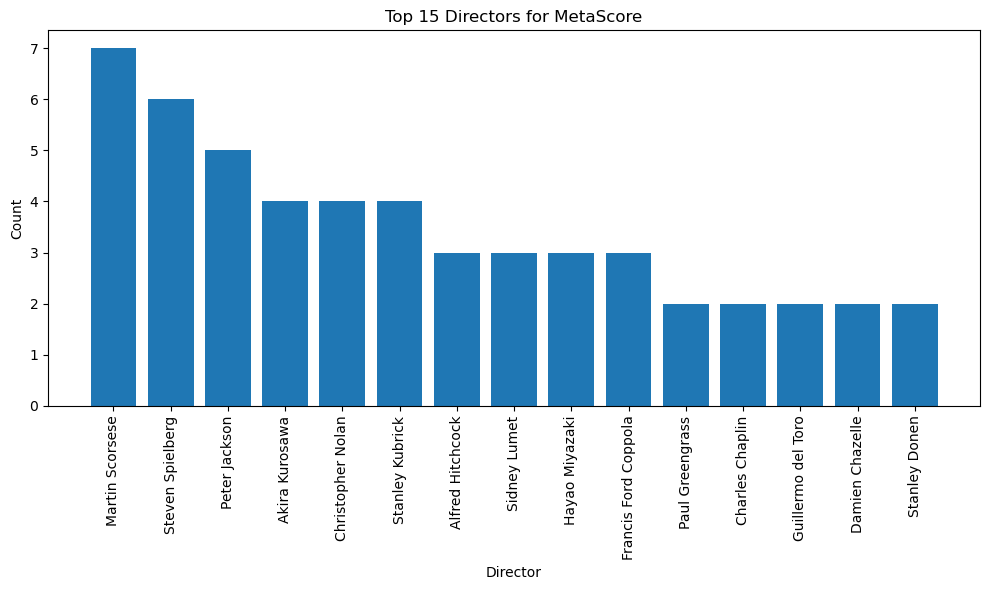

In [97]:
# Create a histogram of the top 15 directors
plt.figure(figsize=(10, 6))
plt.bar(directormeta_sorted['Director'].head(15), directormeta_sorted['Count'].head(15))
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 15 Directors for MetaScore')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [98]:
# Find the common directors
common_directors = set(directorimdb_sorted.head(15)['Director']) & set(directormeta_sorted.head(15)['Director'])

# Display the result
common_directors

{'Akira Kurosawa',
 'Alfred Hitchcock',
 'Charles Chaplin',
 'Christopher Nolan',
 'Francis Ford Coppola',
 'Hayao Miyazaki',
 'Martin Scorsese',
 'Peter Jackson',
 'Stanley Kubrick',
 'Steven Spielberg'}

## Pre Processing

#### TRUTH TABLE

In [99]:
encoded_df2 = pd.get_dummies(df2, columns = ['Genre', 'Certificates'])

encoded_df2



,Title,IMDb Rating,Year,Director,Star Cast,MetaScore,Duration (minutes),Genre_Action,Genre_Adventure,Genre_Animation,...,Certificates_PG-13,Certificates_Passed,Certificates_R,Certificates_TV-14,Certificates_TV-G,Certificates_TV-MA,Certificates_TV-PG,Certificates_TV-Y7,Certificates_Unrated,Certificates_X
0,End of the Spear,6.8,2005,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,Elvira Madigan,7.0,1967,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,The Kid Stays in the Picture,7.3,2002,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,It Ain't Over,8.2,2022,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Mahler,7.0,1974,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3167,12 Angry Men,9.0,1957,Sidney Lumet,Reginald Rose,97.0,96.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3170,The Dark Knight,9.0,2008,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3171,The Godfather,9.2,1972,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [100]:
encoded_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2762 entries, 0 to 3172
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2762 non-null   object 
 1   IMDb Rating             2762 non-null   float64
 2   Year                    2762 non-null   int64  
 3   Director                2762 non-null   object 
 4   Star Cast               2762 non-null   object 
 5   MetaScore               2762 non-null   float64
 6   Duration (minutes)      2762 non-null   float64
 7   Genre_Action            2762 non-null   bool   
 8   Genre_Adventure         2762 non-null   bool   
 9   Genre_Animation         2762 non-null   bool   
 10  Genre_Biography         2762 non-null   bool   
 11  Genre_Comedy            2762 non-null   bool   
 12  Genre_Crime             2762 non-null   bool   
 13  Genre_Documentary       2762 non-null   bool   
 14  Genre_Drama             2762 non-null   bool 

#### UNIQUE IDENTIFIER 

In [101]:
df2_num = df2.copy()

df2_num

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


In [102]:
# Create a LabelEncoder instance for 'Genre'
le_genre = LabelEncoder()

# Create a LabelEncoder instance for 'Certificates'
le_certificates = LabelEncoder()

# Fit the LabelEncoder instances to the original dataset
le_genre.fit(df2_num['Genre'])
le_certificates.fit(df2_num['Certificates'])

# Transform the 'Genre' and 'Certificates' columns of the new dataset
df2_num['Genre'] = le_genre.transform(df2_num['Genre'])
df2_num['Certificates'] = le_certificates.transform(df2_num['Certificates'])


df2_num

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,6,1,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,5,3,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,8,6,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,5,6,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,5,3,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,8,5,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,0,5,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,6,0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,8,5,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


In [103]:
# Create a dictionary to map numerical values to genre names
genre_dict = dict(zip(le_genre.classes_, le_genre.transform(le_genre.classes_)))
certificate_dict = dict(zip(le_certificates.classes_, le_certificates.transform(le_certificates.classes_)))

print("Genre Mapping:")
for genre, code in genre_dict.items():
    print(f"{genre}: {code}")

print("Certificate Mapping:")
for certificate, code in certificate_dict.items():
    print(f"{certificate}: {code}")

Genre Mapping:
Action: 0
Adventure: 1
Animation: 2
Biography: 3
Comedy: 4
Crime: 5
Documentary: 6
Drama: 7
Family: 8
Fantasy: 9
History: 10
Horror: 11
Musical: 12
Mystery: 13
Reality-TV: 14
Romance: 15
Sci-Fi: 16
Certificate Mapping:
Approved: 0
G: 1
M/PG: 2
NC-17: 3
Not Rated: 4
PG: 5
PG-13: 6
Passed: 7
R: 8
TV-14: 9
TV-G: 10
TV-MA: 11
TV-PG: 12
TV-Y7: 13
Unrated: 14
X: 15


In [104]:
df2

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


In [105]:
df2_num

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,6,1,Jim Hanon,"Louie Leonardo, Chad Allen, Jack Guzman",45.0,108.0
1,Elvira Madigan,7.0,1967,5,3,Bo Widerberg,"Pia Degermark, Thommy Berggren, Lennart Malmer",66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,8,6,Nanette Burstein,"Robert Evans, Eddie Albert, Peter Bart",75.0,93.0
3,It Ain't Over,8.2,2022,5,6,Sean Mullin,"Andy Andres, Roger Angell, Marty Appel",79.0,99.0
4,Mahler,7.0,1974,5,3,Ken Russell,"Robert Powell, Georgina Hale, Lee Montague",66.0,115.0
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,8,5,Francis Ford Coppola,"Francis Ford, Mario Puzo",90.0,202.0
3167,12 Angry Men,9.0,1957,0,5,Sidney Lumet,Reginald Rose,97.0,96.0
3170,The Dark Knight,9.0,2008,6,0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",84.0,152.0
3171,The Godfather,9.2,1972,8,5,Francis Ford Coppola,"Mario Puzo, Francis Ford",100.0,175.0


In [106]:
df = df2_num.drop(columns=['Title', 'Director', 'Star Cast'])
df

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,6.8,2005,6,1,45.0,108.0
1,7.0,1967,5,3,66.0,91.0
2,7.3,2002,8,6,75.0,93.0
3,8.2,2022,5,6,79.0,99.0
4,7.0,1974,5,3,66.0,115.0
...,...,...,...,...,...,...
3166,9.0,1974,8,5,90.0,202.0
3167,9.0,1957,0,5,97.0,96.0
3170,9.0,2008,6,0,84.0,152.0
3171,9.2,1972,8,5,100.0,175.0


C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Wayne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

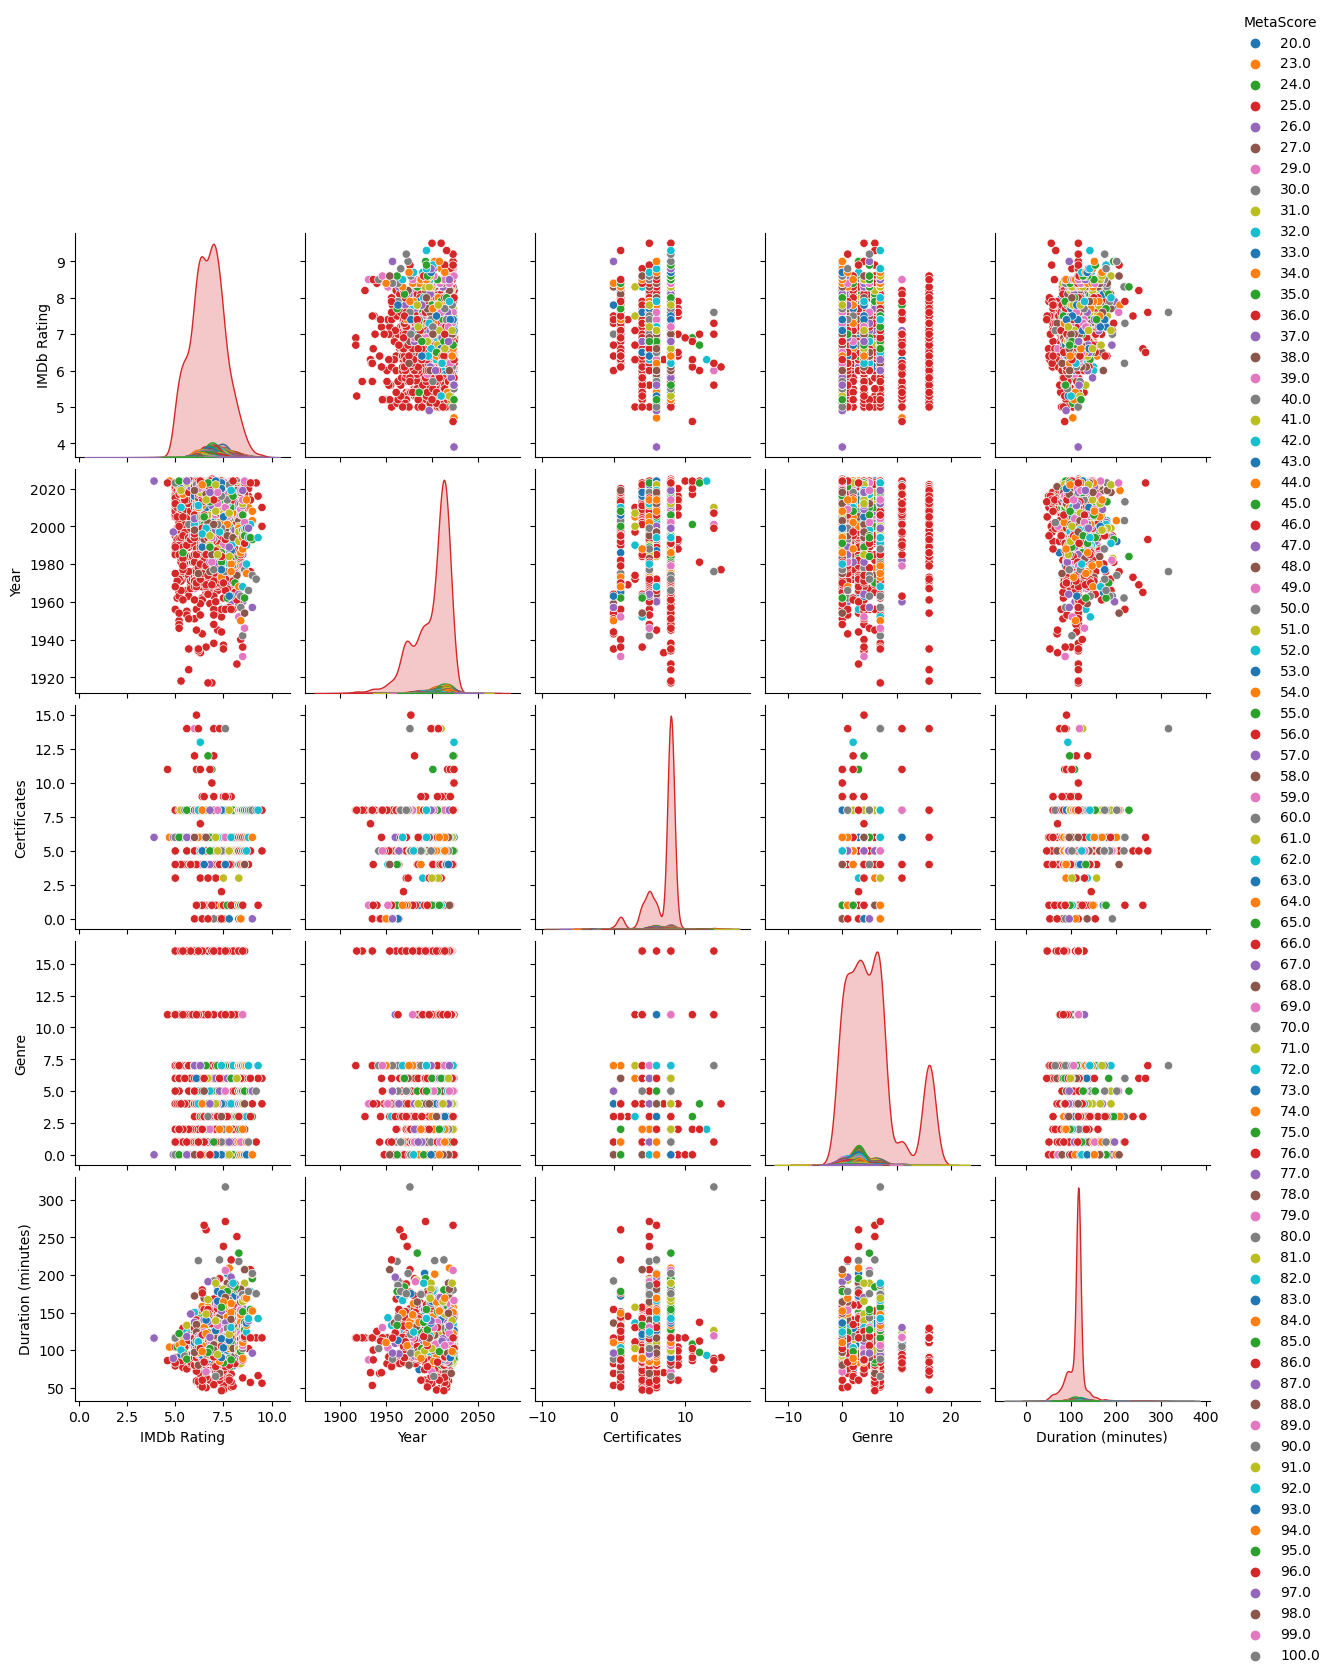

In [431]:
#run the code here

# Create pair plot with custom settings
sns.pairplot(data=df, hue="MetaScore", diag_kind="kde", palette="tab10") 
#read on what the diag_kind hyperparameter does

# Show plot
plt.show()

In [433]:
class_distribution = df['Genre'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable
print(class_distribution)

Genre
3     0.259457
0     0.177302
7     0.148261
6     0.089797
4     0.086358
2     0.065724
1     0.063814
16    0.061521
11    0.024073
5     0.023691
Name: proportion, dtype: float64


In [109]:
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 46


In [110]:
df = df.drop_duplicates(keep=False)
df

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,6.8,2005,6,1,45.0,108.0
1,7.0,1967,5,3,66.0,91.0
2,7.3,2002,8,6,75.0,93.0
3,8.2,2022,5,6,79.0,99.0
4,7.0,1974,5,3,66.0,115.0
...,...,...,...,...,...,...
3166,9.0,1974,8,5,90.0,202.0
3167,9.0,1957,0,5,97.0,96.0
3170,9.0,2008,6,0,84.0,152.0
3171,9.2,1972,8,5,100.0,175.0


In [135]:
duplicates = df[df.duplicated()]
duplicates

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)


In [402]:
# Count occurrences of each category
category_counts = df['Genre'].value_counts()

# Get the top 10 categories with the highest number of samples
top_10_categories = category_counts.head(10).index

# Filter the DataFrame to keep only the top 10 categories
df = df[df['Genre'].isin(top_10_categories)]
df

,IMDb Rating,Year,Certificates,Genre,MetaScore,Duration (minutes)
0,6.8,2005,6,1,45.0,108.0
1,7.0,1967,5,3,66.0,91.0
2,7.3,2002,8,6,75.0,93.0
3,8.2,2022,5,6,79.0,99.0
4,7.0,1974,5,3,66.0,115.0
...,...,...,...,...,...,...
3166,9.0,1974,8,5,90.0,202.0
3167,9.0,1957,0,5,97.0,96.0
3170,9.0,2008,6,0,84.0,152.0
3171,9.2,1972,8,5,100.0,175.0


In [403]:
class_distribution = df['Genre'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable
print(class_distribution)

Genre
3     0.259457
0     0.177302
7     0.148261
6     0.089797
4     0.086358
2     0.065724
1     0.063814
16    0.061521
11    0.024073
5     0.023691
Name: proportion, dtype: float64


### Data Splitting and Training

The dataset was divided into features (X) and target (y) to facilitate the development and evaluation of a predictive model. The target variable is 'Genre', while the features include 'IMDb Rating', 'Year', 'MetaScore', and 'Duration (minutes)'. This separation allows us to train the model on the features (X) to predict the target (y), and subsequently assess its performance in predicting genres based on the provided attributes. Splitting the dataset in this manner helps in building, tuning, and validating the model effectively.

In [494]:
# Features and target variable
features = ['IMDb Rating', 'Year', 'MetaScore', 'Duration (minutes)']
X = df[features]
y = df['Genre']

In [495]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [496]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [497]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [498]:
#Let us see the proportions of the train-test sets
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (2617, 4), Output: (2617,)
Train Set Size | Input: (2093, 4), Output: (2093,)
Test Set Size | Input: (524, 4), Output: (524,)


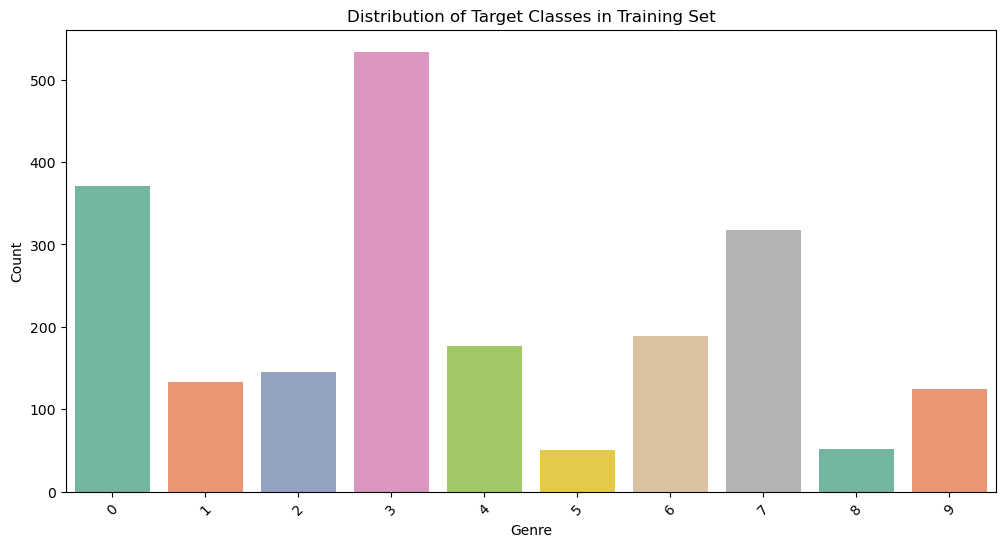

In [500]:
# Visualize the distribution of target classes in the training set
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette="Set2")
plt.title('Distribution of Target Classes in Training Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Model Building and Evaluation

The section will cover three key models: **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, and **Logistic Regression.**

#### SVM

SVM aims to find the hyperplane that maximizes the margin between different classes, and can handle non-linearly separable data through the use of kernel functions; it is effective in high-dimensional spaces but computationally intensive.

In [576]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

In [577]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Score: 0.3363624944330886


In [578]:
# Initialize SVM model with class weights
svm = SVC(class_weight='balanced', kernel='rbf', C=1, random_state=42)  # You can use 'linear', 'rbf', etc.

In [579]:
# Train the model
svm.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', random_state=42)

In [607]:
# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [608]:
# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.2748091603053435


In [622]:
# Classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.16      0.20        93
           1       0.06      0.09      0.07        34
           2       0.12      0.11      0.12        27
           3       0.60      0.37      0.46       145
           4       0.24      0.10      0.14        49
           5       0.05      0.08      0.06        12
           6       0.43      0.61      0.50        46
           7       0.22      0.03      0.05        71
           8       0.07      0.36      0.12        11
           9       0.22      0.81      0.35        36

    accuracy                           0.27       524
   macro avg       0.23      0.27      0.21       524
weighted avg       0.33      0.27      0.27       524



#### INTERPRETATION

The classification report for the SVM model reveals varying performance across different classes. Precision, recall, and F1-score metrics are provided for each class, indicating how well the model predicts each category. For instance, class 3 has the highest precision and recall, demonstrating relatively better performance, while classes 1, 2, and 5 exhibit very low scores, indicating poor performance. The model struggles significantly with classes such as 7 and 5, where recall is extremely low, meaning it fails to identify most instances of these classes. The overall accuracy of the model is 27%, suggesting it correctly classified only a quarter of the instances. The macro average, which treats all classes equally, shows a precision of 0.23, recall of 0.27, and F1-score of 0.21, reflecting the model's balanced performance across all classes. The weighted average, which accounts for the support of each class, indicates a precision of 0.33, recall of 0.27, and F1-score of 0.27, providing a more comprehensive view of the model’s performance considering the frequency of each class. Overall, the SVM model's performance is inconsistent across classes, with a need for further tuning or alternative approaches to enhance classification accuracy.

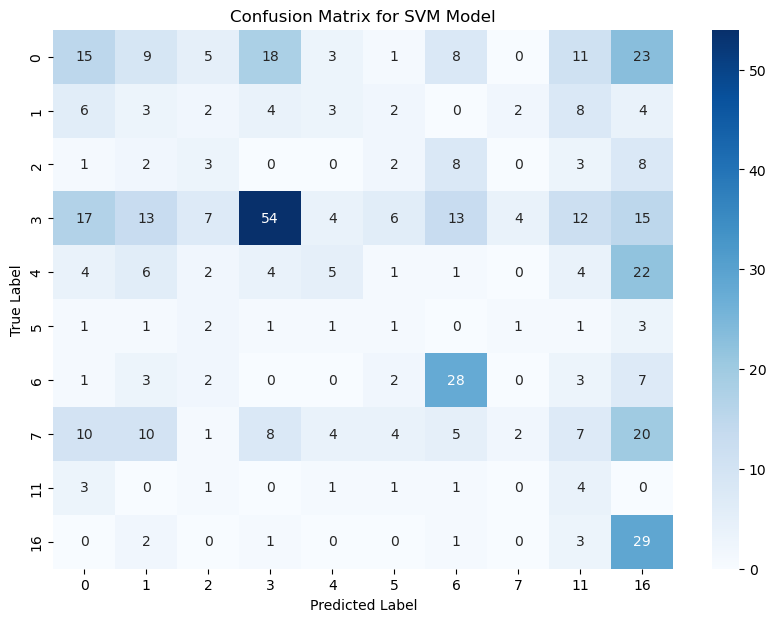

In [584]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

Based on the diagonal values, the model seems to have a decent accuracy for some classes like 3, 6, and 16, but struggles with others like 0, 1, and 2.

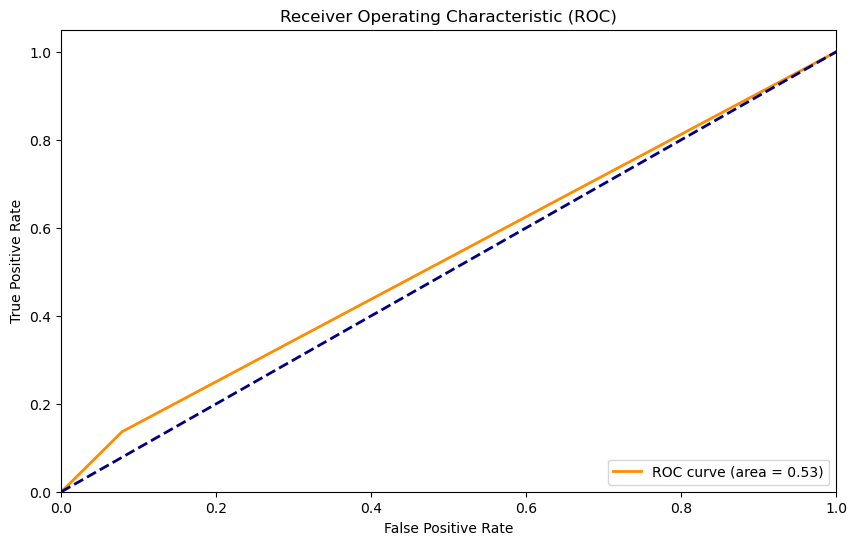

In [585]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

The ROC curve is a straight diagonal line with an area under the curve (AUC) of 0.53. This indicates that the model's performance is only slightly better than random guessing.
The TPR is consistently low, indicating that the model has difficulty correctly identifying positive instances. On the other hand, the FPR is also consistently low, suggesting that the model rarely misclassifies negative instances as positive. Moreover, the AUC is 0.53 which suggests that the model has very limited discriminatory power.

### Logistic Regression

Logistic Regression, a statistical method for binary classification, estimates class probabilities using a logistic function and assumes a linear relationship between features and the log-odds of the target, with regularization techniques available to prevent overfitting.

In [544]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [586]:
# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Define the parameter grid for regularization parameter and penalty
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.31771705244887005


C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

In [587]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression(
    C=10,                  # Regularization parameter
    penalty='l2',           # Type of regularization
    random_state=42,        # Seed for reproducibility
    max_iter=1000           # Maximum number of iterations for convergence
)

In [588]:
# Fit the model
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [605]:
# Predict the test set
y_pred_logreg = logistic_regression.predict(X_test)

In [606]:
# Evaluate the model
accuracy_score(y_test, y_pred_logreg)

0.3148854961832061

In [621]:
print("Classification Report:\n", classification_report(y_test, y_pred_logreg,zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.03      0.05        93
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        27
           3       0.33      0.84      0.47       145
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        12
           6       0.48      0.61      0.54        46
           7       0.21      0.17      0.19        71
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        36

    accuracy                           0.31       524
   macro avg       0.11      0.17      0.12       524
weighted avg       0.18      0.31      0.21       524



#### INTERPRETATION

The classification report for the model indicates its performance across multiple classes, highlighting a varied ability to predict each category. For class 3, the model shows the strongest performance with a precision of 0.33, recall of 0.84, and an F1-score of 0.47, suggesting it effectively identifies instances of this class. However, for classes 0, 1, 2, 4, 5, 8, and 9, the model performs poorly, with precision, recall, and F1-scores often at zero, meaning it fails to correctly identify or classify instances in these categories. Class 6 shows moderate performance with a precision of 0.48, recall of 0.61, and an F1-score of 0.54. The overall accuracy of the model is 31%, indicating that it correctly classified 31% of the total instances. The macro average, which provides an unweighted average of performance metrics across all classes, shows a precision of 0.11, recall of 0.17, and an F1-score of 0.12. The weighted average, which considers the number of instances per class, reveals a precision of 0.18, recall of 0.31, and an F1-score of 0.21. These results suggest that while the model performs reasonably well for some classes, it struggles significantly with others, and overall performance remains low, indicating a need for further improvement or re-evaluation.

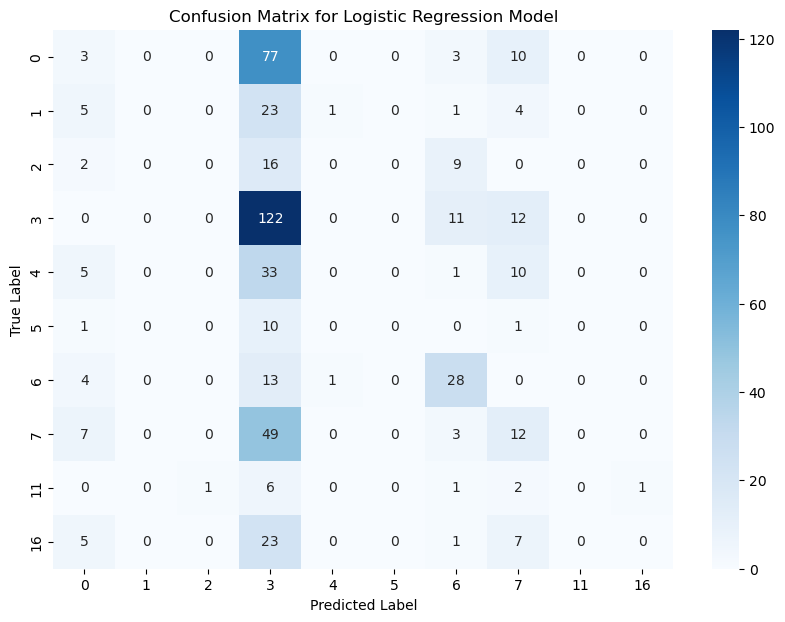

In [592]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

There's a noticeable diagonal dominance, especially for classes 3 and 6, suggesting the model performs relatively well for these classes. 

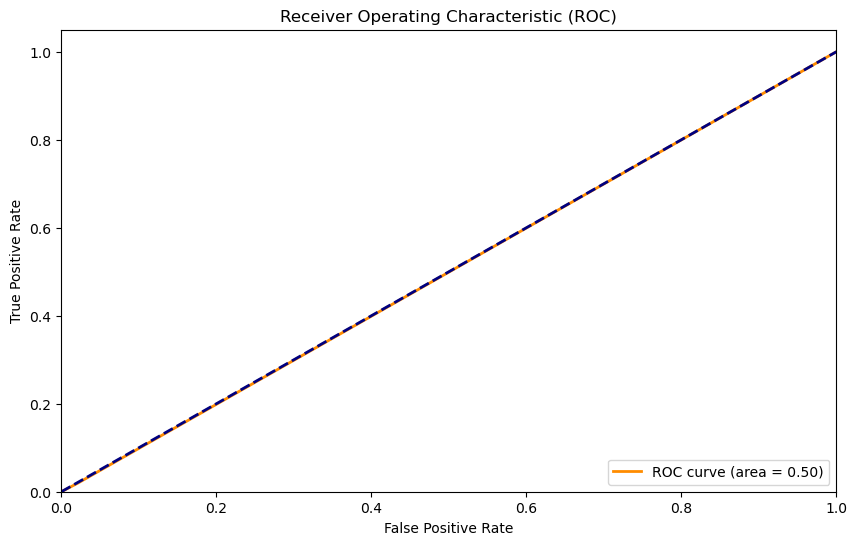

In [593]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

The ROC curve is a straight diagonal line, which is characteristic of a random classifier. This means the model's predictions are essentially equivalent to random guessing. The AUC is 0.50, which confirms the model's poor performance. An AUC of 0.5 indicates a model that is no better than random chance.

### KNN Classifier

KNN is a simple, instance-based learning algorithm where the class of a data point is determined by the majority class among its k nearest neighbors, with performance dependent on the choice of distance metric and the number of neighbors. 

In [595]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [553]:
# Ensure n_neighbors is valid
n_neighbors = min(20, len(X_train))  # Set n_neighbors to a valid number
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [554]:
# Train the kNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [603]:
# Predict and evaluate
y_pred_knn = knn.predict(X_test)

In [604]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.25      0.23        93
           1       0.00      0.00      0.00        34
           2       0.13      0.07      0.10        27
           3       0.44      0.72      0.54       145
           4       0.20      0.10      0.14        49
           5       0.00      0.00      0.00        12
           6       0.54      0.54      0.54        46
           7       0.25      0.18      0.21        71
           8       0.00      0.00      0.00        11
           9       0.26      0.28      0.27        36

    accuracy                           0.35       524
   macro avg       0.20      0.21      0.20       524
weighted avg       0.28      0.35      0.30       524



#### INTERPRETATION

The classification report for the model shows varying performance across different classes. For class 3, the model performs best with a precision of 0.44, recall of 0.72, and an F1-score of 0.54, indicating a relatively strong ability to identify and classify instances of this class. Class 6 also shows good performance with an equal precision, recall, and F1-score of 0.54, suggesting consistent identification of this class. However, the model struggles with classes 1, 2, 4, 5, 8, and 9, where precision, recall, and F1-scores are notably lower, with some classes having a precision, recall, and F1-score of zero, indicating poor performance. The overall accuracy of the model is 35%, meaning it correctly classified 35% of the instances. The macro average, which provides an unweighted average of performance metrics across all classes, shows a precision of 0.20, recall of 0.21, and an F1-score of 0.20. The weighted average, which considers the support of each class, shows a precision of 0.28, recall of 0.35, and an F1-score of 0.30. These metrics suggest that while the model has some strengths in identifying certain classes, it generally exhibits lower overall performance and may benefit from further refinement to improve its classification across all classes.

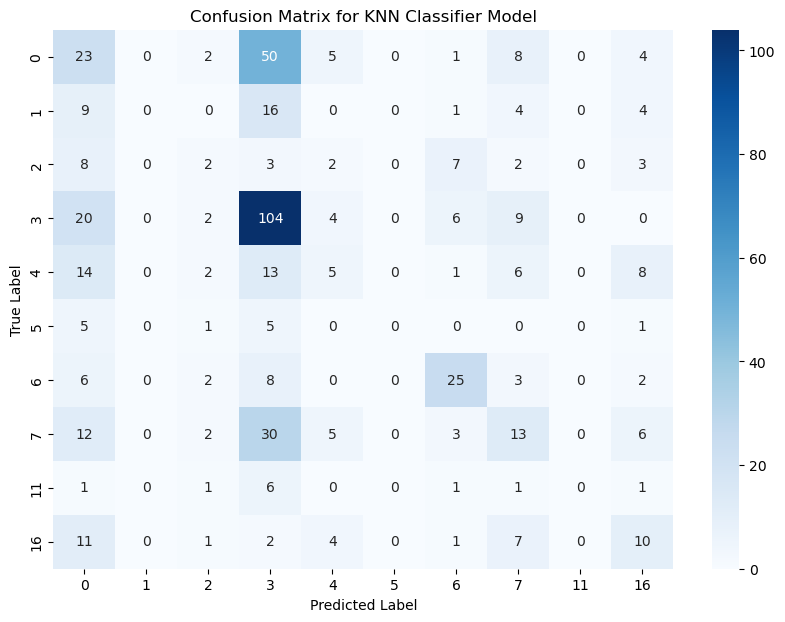

In [557]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for KNN Classifier Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### INTERPRETATION

The diagonal elements (top-left to bottom-right) represent correct predictions. There's a noticeable diagonal dominance, especially for classes 3 and 6, suggesting the model performs relatively well for these classes.

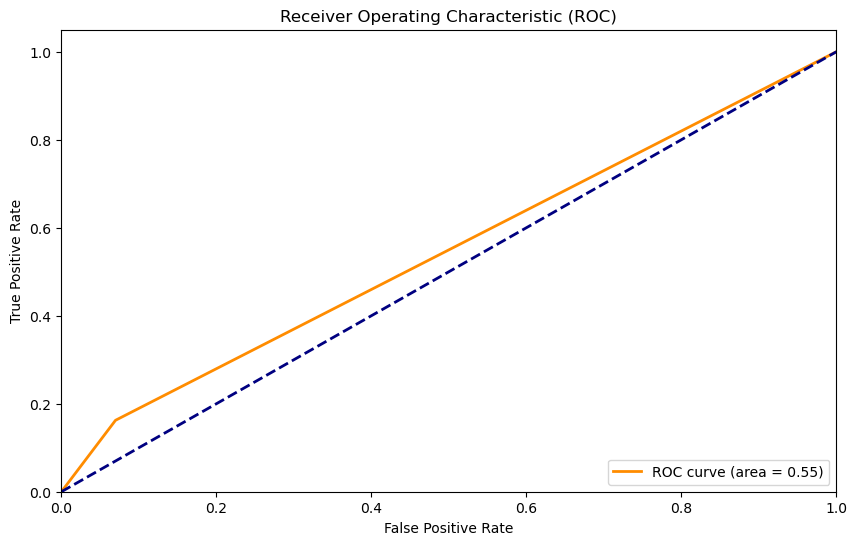

In [558]:
# Binarize the output labels for ROC curve (if more than 2 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### INTERPRETATION

The ROC curve closely resembles a diagonal line, which is characteristic of a random classifier. This means the model's predictions are essentially equivalent to random guessing. The AUC is 0.55, which is very close to 0.5. An AUC of 0.5 indicates a model that is no better than random chance.

#### Training KNN Classifier with different k values

In [522]:
# List of k values to test
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

In [523]:
# Test k values
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

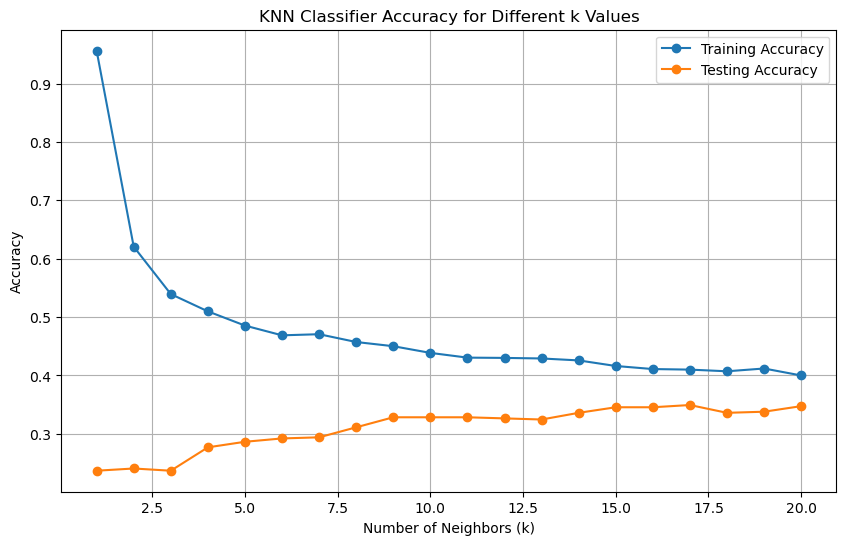

In [524]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [599]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a list of k values to experiment with
k_values = [3, 5, 7, 9, 10, 12]

# Perform cross-validation for each value of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
    print(f"Average accuracy for k={k}: {np.mean(scores)}")

Average accuracy for k=3: 0.262307156478743
Average accuracy for k=5: 0.2928880565484008
Average accuracy for k=7: 0.30675337725959506
Average accuracy for k=9: 0.3120039739183063
Average accuracy for k=10: 0.311524363088237
Average accuracy for k=12: 0.31008553059802907


### MODEL COMPARISON

In [630]:
# Generate classification reports
report_svm = classification_report(y_test, y_pred_svm, zero_division=0, output_dict=True)
report_logreg = classification_report(y_test, y_pred_logreg, zero_division=0, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, zero_division=0, output_dict=True)

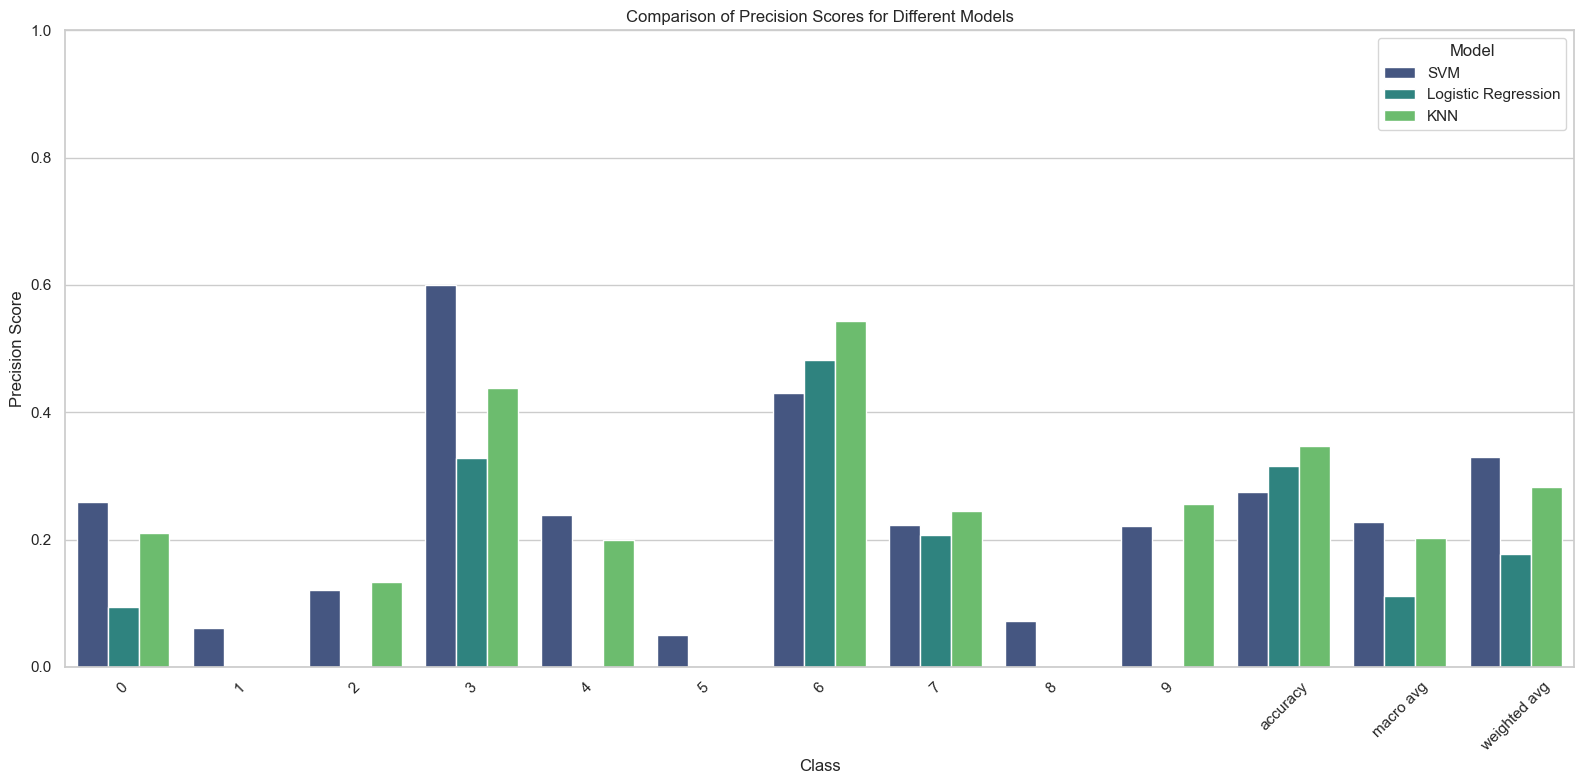

In [637]:
# Convert reports to DataFrames
def precision_to_df(report, model_name):
    # Extract only precision for each class and convert to DataFrame
    precision_df = pd.DataFrame(report).transpose()[['precision']]
    precision_df['Model'] = model_name
    precision_df = precision_df.reset_index().rename(columns={'index': 'Class', 'precision': 'Precision'})
    return precision_df

df_svm = precision_to_df(report_svm, 'SVM')
df_logreg = precision_to_df(report_logreg, 'Logistic Regression')
df_knn = precision_to_df(report_knn, 'KNN')

# Combine DataFrames
df_combined = pd.concat([df_svm, df_logreg, df_knn])

# Set plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(16, 8))

# Plot Precision for each class across models
sns.barplot(x='Class', y='Precision', hue='Model', data=df_combined, palette='viridis')

# Add titles and labels
plt.title('Comparison of Precision Scores for Different Models')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.legend(title='Model')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### INTERPRETATION

The comparative analysis of the three models reveals differing levels of performance. The SVM model, with an accuracy of 27%, shows a mixed performance. The macro average metrics, with precision of 0.23, recall of 0.27, and F1-score of 0.21, suggest a relatively low ability to classify instances correctly across all classes. However, the weighted averages, precision of 0.33, recall of 0.27, and F1-score of 0.27, indicate slightly better performance when considering the support of each class. Overall, the SVM model performs unevenly across different classes, with some categories achieving better results than others.

On the other hand, the Logistic Regression Model, yielded zero scores for several classesbut shows an overall accuracy of 31%. Despite this improvement in accuracy compared to the SVM model, the macro average metrics—precision of 0.11, recall of 0.17, and F1-score of 0.12 remain low, thus, highlighting poor performance across most classes. The weighted averages, precision of 0.18, recall of 0.31, and F1-score of 0.21, reflect better performance when accounting for class support, but the results still indicate suboptimal classification.

In contrast, the current model achieves the highest overall accuracy at 35%. The macro average metrics, precision of 0.20, recall of 0.21, and F1-score of 0.20, show improved performance compared to the previous models, though they remain relatively low. The weighted averages, precision of 0.28, recall of 0.35, and F1-score of 0.30, demonstrate better handling of class imbalances and higher class-specific performance. This model represents an improvement in accuracy and performance metrics, indicating a better capability to classify instances correctly, though further tuning and refinement are still necessary to enhance performance across all classes.

The average accuracy for the KNN classifier with k=9 is 0.312. This indicates that the best performance for the KNN model is achieved with k=9.